In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=dataset.iloc[:, [3,4]].values

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn import datasets
from sklearn import metrics

# Load a sample dataset (you can replace this with your own dataset)
#iris = datasets.load_iris()
#data = iris.data


# Create an Affinity Propagation instance and fit the data
affinity_propagation = AffinityPropagation(damping=0.9, preference=-50).fit(x)

# Get cluster labels
labels = affinity_propagation.labels_

# Evaluate the clustering performance (optional)
silhouette_score = metrics.silhouette_score(x, labels, metric='euclidean')
print(f"Silhouette Score: {silhouette_score}",'\n')

# Print the cluster centers (exemplars)
print("Cluster centers (exemplars):")
print(x[affinity_propagation.cluster_centers_indices_],'\n')

# Print the number of clusters and cluster labels
n_clusters = len(set(labels))
print(f"Number of clusters: {n_clusters}",'\n')
print(f"Cluster labels: {labels}")


Silhouette Score: 0.40050867645825394 

Cluster centers (exemplars):
[[ 17  40]
 [ 17  76]
 [ 18   6]
 [ 19  14]
 [ 19  99]
 [ 21  66]
 [ 24  35]
 [ 24  73]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 30   4]
 [ 33  92]
 [ 33  14]
 [ 34  73]
 [ 37  26]
 [ 38  35]
 [ 39  61]
 [ 39  28]
 [ 43  45]
 [ 46  56]
 [ 48  50]
 [ 54  54]
 [ 54  42]
 [ 54  46]
 [ 57  58]
 [ 61  42]
 [ 62  48]
 [ 62  55]
 [ 65  43]
 [ 67  57]
 [ 71  75]
 [ 72  34]
 [ 73   7]
 [ 75  93]
 [ 76  87]
 [ 77  36]
 [ 78  20]
 [ 78  76]
 [ 78   1]
 [ 81   5]
 [ 85  26]
 [ 87  92]
 [ 88  13]
 [ 88  69]
 [ 97  32]
 [ 98  88]
 [ 99  39]
 [ 99  97]
 [101  68]
 [103  17]
 [103  23]
 [103  69]
 [113   8]
 [113  91]
 [120  16]
 [120  79]
 [126  28]
 [126  74]
 [137  18]
 [137  83]] 

Number of clusters: 61 

Cluster labels: [ 0  1  2  1  0  1  2  4  2  1  3  4  3  1  3  1  6  5  9  4  6  7 11  7
 13  8  9 10  9  8 11 14 11 12 13  8 13 14 15 14 16 12 16 17 18 17 17 19
 19 19 20 17 20 17 19 19 21 19 21 19 20 20 21 20 21 20 21 21 20 21 20 

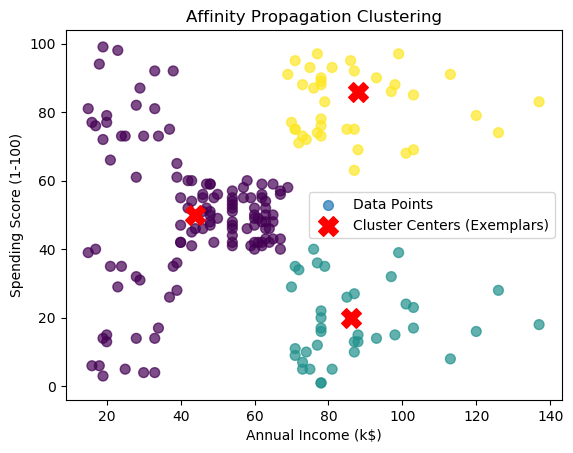

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

# Load the dataset
#dataset = pd.read_csv('Mall_Customers.csv')

# Select columns 3 and 4 for clustering (assuming 0-based indexing)
#x = dataset.iloc[:, [3, 4]].values

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply Affinity Propagation
affinity_propagation = AffinityPropagation(damping=0.9, preference=-50)
affinity_propagation.fit_predict(x_scaled)

# Get cluster centers (exemplars) and labels
cluster_centers_indices = affinity_propagation.cluster_centers_indices_
if cluster_centers_indices.size == 0:
    print("No cluster centers found.")
    exit()

cluster_centers = x[cluster_centers_indices]
cluster_labels = affinity_propagation.labels_

# Plot the data points and cluster centers
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers (Exemplars)')
plt.title('Affinity Propagation Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
